# Heart Disease Death Prediction

---------------------------------------------------------------------------------

## Inital Checks

In [1]:
# Importing important packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Fetching the data

df = pd.read_csv('datasets_heart_failure_clinical_records_dataset.csv')

In [3]:
# Viewing the data

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Dataset overview:

* There are 299 records in the dataset, with 12 features: 

age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking and time 

* The target variable is DEATH_EVENT


* There are 7 quantitative and 5 qualitative features.


* Quantitative features:\
age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium and time\


* Qualitative features:\
anaemia, diabetes, high_blood_pressure, sex and smoking\


* There are no missing values

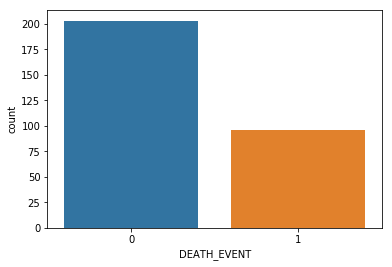

In [4]:
# Visualising the distribution of DEATH_EVENT

sns.countplot(df['DEATH_EVENT'])

In [5]:
print('Percentage of records have DEATH_EVENT: {}%'.format(round(df['DEATH_EVENT'].sum()/len(df)*100),3))

Percentage of records have DEATH_EVENT: 32.0%


We see that the distribution of the target variable is slightly unbalanced. However, I wouldn't say it is unbalanced enough to use an oversampling or undersampling technique.

Considering that false negatives are important, we might want to train the model to maximise 'recall' score. However, due to this being a small dataset I will choose to simply maximise 'accuracy'.

### Looking for Outliers:

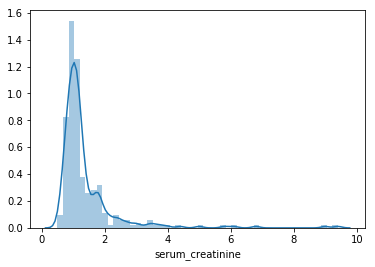

In [6]:
# Plotting the distribution of the serum_creatinine column

sns.distplot(df['serum_creatinine'])

In [7]:
df[df['serum_creatinine']>4]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
28,58.0,1,60,0,38,0,153000.00,5.8,134,1,0,26,1
48,80.0,1,553,0,20,1,140000.00,4.4,133,1,0,41,1
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
131,60.0,1,1082,1,45,0,250000.00,6.1,131,1,0,107,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
228,65.0,0,56,0,25,0,237000.00,5.0,130,0,0,207,0


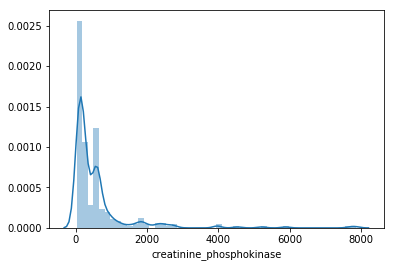

In [8]:
# Plotting the distribution of the creatinine_phosphokinase column

sns.distplot(df['creatinine_phosphokinase'])

In [9]:
df[df['creatinine_phosphokinase']>3000]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
52,60.0,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1
103,42.0,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0
134,81.0,0,4540,0,35,0,231000.00,1.18,137,1,1,107,0
171,52.0,0,3966,0,40,0,325000.00,0.90,140,1,1,146,0


We'll treat the rows shown above as outliers, as they could cause problems during the training of our model.

In [10]:
# Getting rid of outliers 

df = df.drop([9,28,48,52,131,217,228,1,52,60,72,103,134,171])
df = df.reset_index(drop=True)

---------------------------------------------------------------------------------

## Feature Engineering

In [11]:
# Rescaling skewed features

df['creatinine_phosphokinase'] = np.log(df['creatinine_phosphokinase'])
df['serum_creatinine'] = np.log(df['serum_creatinine'])

Next, I will look into which features seem to influence DEATH_EVENT the most.

I will then generate new features.

I will split into a training and test set now in order to remove any bias in chosing these special features.\
I will set a random_state of 42 in order to be consistent with which data entries are used for training and testing.

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train = pd.concat([X_train, y_train], axis=1)

In [13]:
# Seeing which features have the highest correlation with DEATH_EVENT

train.corr()['DEATH_EVENT'].sort_values()

time                       -0.522495
ejection_fraction          -0.294449
serum_sodium               -0.200197
diabetes                   -0.012182
platelets                  -0.010817
creatinine_phosphokinase   -0.007048
sex                         0.018693
anaemia                     0.031318
smoking                     0.034041
high_blood_pressure         0.080083
age                         0.261032
serum_creatinine            0.415227
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

As we can see, the features which seem to have the largest impact on DEATH_EVENT are (in descending order):
* time
* serum_creatinine
* ejection_fraction
* age
* serum_sodium

Let's generate new features using these:

In [14]:
# Feature generation

df['creatnine/ejection'] = df['serum_creatinine']/df['ejection_fraction']
df['creatnine/sodium'] = df['serum_creatinine']/df['serum_sodium']
df['creatnine/time'] = df['serum_creatinine']/df['time']
df['age_creatnine'] =  df['serum_creatinine']*df['age']
df['age/ejection'] = df['age']/df['ejection_fraction']
df['age/sodium'] = df['age']/df['serum_sodium']
df['age/time'] = df['age']/df['time']
df['sodium_ejection'] = df['serum_sodium']*df['ejection_fraction']
df['sodium_time'] = df['serum_sodium']*df['time']
df['ejection_time'] = df['ejection_fraction']*df['time']

Next, I will normalise the quantiative features

In [15]:
quantitative = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
               'serum_creatinine', 'serum_sodium', 'time', 'creatnine/ejection',
               'creatnine/sodium', 'age_creatnine', 'age/ejection', 
               'age/sodium', 'sodium_ejection']

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[quantitative] = sc.fit_transform(df[quantitative])

---------------------------------------------------------------------------------

## Model Building

Now, due to the dataset being having few entries, I will reduce the number of features used in the model - as this will decrease variance.

As i did previously, I will split the new dataset into the same train and test sets, and view the features which have a large absolute correlation with DEATH_EVENT

In [16]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train = pd.concat([X_train, y_train], axis=1)

train.corr()['DEATH_EVENT'].sort_values()

ejection_time              -0.579251
sodium_time                -0.524682
time                       -0.522495
sodium_ejection            -0.305453
ejection_fraction          -0.294449
serum_sodium               -0.200197
diabetes                   -0.012182
platelets                  -0.010817
creatinine_phosphokinase   -0.007048
sex                         0.018693
anaemia                     0.031318
smoking                     0.034041
high_blood_pressure         0.080083
age                         0.261032
age/sodium                  0.289377
creatnine/time              0.374550
serum_creatinine            0.415227
creatnine/sodium            0.419493
age_creatnine               0.432068
creatnine/ejection          0.433401
age/ejection                0.452385
age/time                    0.469109
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [17]:
# Choosing which features I will use in the model

features = ['creatnine/ejection', 'age/time', 'creatnine/sodium', 'ejection_time']

Now to create the model!

In [18]:
# Importing ML packages

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Creating a list of different models
models = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegression(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifier(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(),
    svm.NuSVC(),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    XGBClassifier()
]

In [19]:
# Split into train and test sets again

X = df[features]
y = df['DEATH_EVENT']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Performing KFold Cross Validation on the train set
# Put the best performing models aside to use in a voting classifier 
# in order to reduce variance

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=2, random_state=42, shuffle=True)

bag = []
for model in models:
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)
    print(scores, str(model).split('(')[0])
    
    if scores[0] + scores[1]>1.65:
        bag.append((str(model).split('(')[0], scores))

[0.74561404 0.80701754] AdaBoostClassifier
[0.78947368 0.86842105] BaggingClassifier
[0.8245614  0.80701754] ExtraTreesClassifier
[0.79824561 0.78947368] GradientBoostingClassifier
[0.80701754 0.83333333] RandomForestClassifier
[0.78070175 0.76315789] GaussianProcessClassifier
[0.8245614  0.86842105] LogisticRegression
[0.75438596 0.71929825] PassiveAggressiveClassifier
[0.83333333 0.84210526] RidgeClassifier
[0.71052632 0.70175439] SGDClassifier
[0.71052632 0.70175439] Perceptron
[0.71052632 0.69298246] BernoulliNB
[0.83333333 0.84210526] GaussianNB
[0.81578947 0.89473684] KNeighborsClassifier
[0.81578947 0.89473684] SVC
[0.8245614  0.90350877] NuSVC
[0.83333333 0.29824561] LinearSVC
[0.78070175 0.72807018] DecisionTreeClassifier
[0.75438596 0.81578947] ExtraTreeClassifier
[0.85087719 0.85087719] LinearDiscriminantAnalysis
[0.84210526 0.8245614 ] QuadraticDiscriminantAnalysis
[0.8245614  0.79824561] XGBClassifier


In [21]:
# Viewing the models to be used in the voting classifier

bag

[('BaggingClassifier', array([0.78947368, 0.86842105])),
 ('LogisticRegression', array([0.8245614 , 0.86842105])),
 ('RidgeClassifier', array([0.83333333, 0.84210526])),
 ('GaussianNB', array([0.83333333, 0.84210526])),
 ('KNeighborsClassifier', array([0.81578947, 0.89473684])),
 ('SVC', array([0.81578947, 0.89473684])),
 ('NuSVC', array([0.8245614 , 0.90350877])),
 ('LinearDiscriminantAnalysis', array([0.85087719, 0.85087719])),
 ('QuadraticDiscriminantAnalysis', array([0.84210526, 0.8245614 ]))]

In [22]:
# Creating the voting classifier

from sklearn.ensemble import VotingClassifier

clf1 = ensemble.BaggingClassifier()
clf2 = linear_model.LogisticRegression()
clf3 = linear_model.RidgeClassifier()
clf4 = naive_bayes.GaussianNB()
clf5 = neighbors.KNeighborsClassifier()
clf6 = svm.SVC()
clf7 = discriminant_analysis.LinearDiscriminantAnalysis()


eclf = VotingClassifier(estimators=[('Bagging', clf1),
                                     ('LogReg', clf2),
                                     ('Ridge', clf3),
                                    ('GaussianNB', clf4),
                                    ('KNN', clf5),
                                   ('SVC', clf6),
                                   ('LDA', clf7)],
                                   voting='hard')
eclf = eclf.fit(X_train, y_train)

In [23]:
# Viewing the cross validation scores for the voting classifier

cross_val_score(eclf, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)

array([0.8245614 , 0.86842105])

Variance seems to be relatively low, so I will forgo hyperparameter optimisation.

In [24]:
# Viewing the score of this classifier on the test set

print('The accuracy of the voting classifier on the test set is: {}%'\
      .format(round(100*eclf.score(X_test,y_test),1)))

The accuracy of the voting classifier on the test set is: 84.5%


In [25]:
# Viewing the recall

from sklearn.metrics import recall_score
recall_score(eclf.predict(X_test), y_test)

0.9285714285714286

As we can see, the scores are very good!

---------------------------------------------------------------------------------

## Summary:

* First of all, there were relatively few data points with a few outliers, so overfitting was a potential problem which needed to be combatted.

* The distribution of DEATH_EVENT was slightly unbalanced, but not enough for us to use sampling techniques when training a model. 

* Upon inspection of the dataset, I found that there were a few very important features in predicting DEATH_EVENT. These were: time, serum_creatinine, ejection_fraction, age and serum_sodium. 

* For these two reasons, I created new features using those which had great importance, and only used a few in the training of the model. 

* As for the metric used for training the model, I chose accuracy. The recall score was of importance considering the target variable being a DEATH_EVENT, however I felt as though accuracy would be easier to optimise, due to this being a small dataset. 

* I then used cross validation on the training set to select models to be used in a voting classifier, in order to reduce overfitting. 

* In the end I created a seemingly low variance model, which performed well on the test set – achieving an accuracy of 84.5%